In [1]:
# import module
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

# setting the Chinese
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

# display setting
%matplotlib inline

In [19]:
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)
plt.rcParams['font.sans-serif'] = ['PingFang']

In [3]:
# from matplotlib.font_manager import FontProperties

# def getChineseFont():  
#     return FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=15)

# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# plt.rcParams['axes.unicode_minus'] = False

In [5]:
# import matplotlib
# matplotlib.get_cachedir()
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# # res = requests.get('https://www.yourator.co/api/v2/jobs?')
# # res_json = res.json()

In [3]:
df = pd.read_csv('Data/DataAnalyst.csv', encoding='gb2312')
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [4]:
# city：公司所在城市
# companyFullName：公司全称
# companyId：公司ID
# companyLabelList：公司标签
# companyShortName：公司简称
# companySize：公司大小
# businessZones：公司所在商区
# firstType：职位所属一级类目
# secondType：职位所属二级类目
# education：学历
# industryField：公司所属领域
# positionId：职位ID
# positionAdvantage：职位优势
# positionName：职位名称
# positionLables：职位标签
# salary：薪水
# workYear：工作年限
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [5]:
df.nunique()

city                   13
companyFullName      2262
companyId            2296
companyLabelList     1297
companyShortName     2243
companySize             6
businessZones        1099
firstType              15
secondType             56
education               5
industryField         175
positionId           5031
positionAdvantage    4201
positionName         2165
positionLables       1048
salary                212
workYear                7
dtype: int64

In [6]:
df_drop = df.drop_duplicates(['positionId']).copy()
df_drop.info()
for salary in df_drop.salary.values:
    if len(salary) == 4:
        print(salary)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB
8k以上
8k以上
9k以上
8k以上
8k以上
8k以上
2k以下
8k以上
4k以上
6k以上
4k以上
8k以上
6k以上
6k以上
5k以上


In [7]:
def get_Salary(str, method='bottom'):
    '''Be used to seperate the salary to different coloumns'''
    pos = str.find('-')
    if pos != -1:
        botSalary = str[:pos-1]
        topSalary = str[pos+1:len(str)-1]
    else:
        botSalary = str[:str.upper().find('K')]
        topSalary = botSalary
    
    if method == 'bottom':
        return botSalary
    else:
        return topSalary

In [8]:
df_drop['Bottom_Salary'] = df_drop.salary.apply(get_Salary).astype('int')
df_drop['Top_Salary'] = df_drop.salary.apply(get_Salary, method = 'top').astype('int')
df_drop.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear,Bottom_Salary,Top_Salary
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,7,9
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,10,15
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,4,6
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,6,8
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2,3


In [9]:
df_drop['Avg_Salary'] = df_drop.apply(lambda x:(x.Bottom_Salary + x.Top_Salary) / 2, axis=1)
df_Collipse = df_drop.loc[:,['city', 'companyFullName', 'companySize', 'education', 'positionName', 'positionLables', 'workYear', 'Avg_Salary']]
df_Collipse.head()

,city,companyFullName,companySize,education,positionName,positionLables,workYear,Avg_Salary
0,上海,纽海信息技术(上海)有限公司,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,上海点荣金融信息服务有限责任公司,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,上海晶樵网络信息技术有限公司,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0
3,上海,杭州数云信息技术有限公司上海分公司,150-500人,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0
4,上海,上海银基富力信息技术有限公司,15-50人,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5


In [10]:
# Start to analyze the Data
profile = pandas_profiling.ProfileReport(df_Collipse)
profile

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


In [11]:
edu_Salary = df_Collipse.pivot_table(index='education', columns='city', values='Avg_Salary')
edu_Salary

city,上海,北京,南京,厦门,天津,广州,成都,杭州,武汉,深圳,苏州,西安,长沙
education,,,,,,,,,,,,,
不限,14.051471,15.673387,7.000000,12.500000,3.5,9.250000,10.562500,18.269231,10.950000,15.100000,NaN,8.666667,7.642857
博士,15.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN
大专,13.395455,12.339474,9.272727,6.785714,5.5,8.988095,11.000000,12.327586,11.214286,13.898936,14.600000,8.150000,9.000000
本科,17.987552,19.435802,11.327869,11.805556,9.3,14.170259,13.520202,16.823432,11.500000,18.532911,14.310345,12.208333,10.633333
硕士,19.180000,19.759740,13.500000,15.750000,NaN,14.571429,12.750000,20.710526,7.000000,18.029412,16.833333,5.000000,9.000000


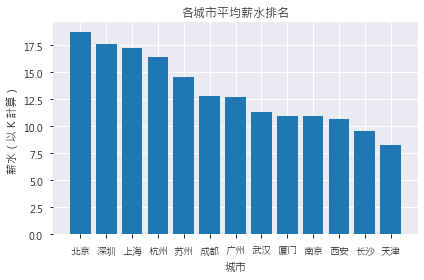

In [50]:
Salary_city = df_Collipse.groupby('city').mean()
Salary_city_sorted = Salary_city.sort_values(by='Avg_Salary', ascending=False)
type(Salary_city_sorted.iloc[0])
type(Salary_city_sorted.iloc[0].max())
plt.bar(data=Salary_city_sorted, x=Salary_city_sorted.index, height=max(Salary_city_sorted))
plt.xlabel('城市')
plt.ylabel('薪水（以 K 計算）')
plt.title('各城市平均薪水排名')
plt.tight_layout()
# plt.xticks(rotation=90)
plt.show()

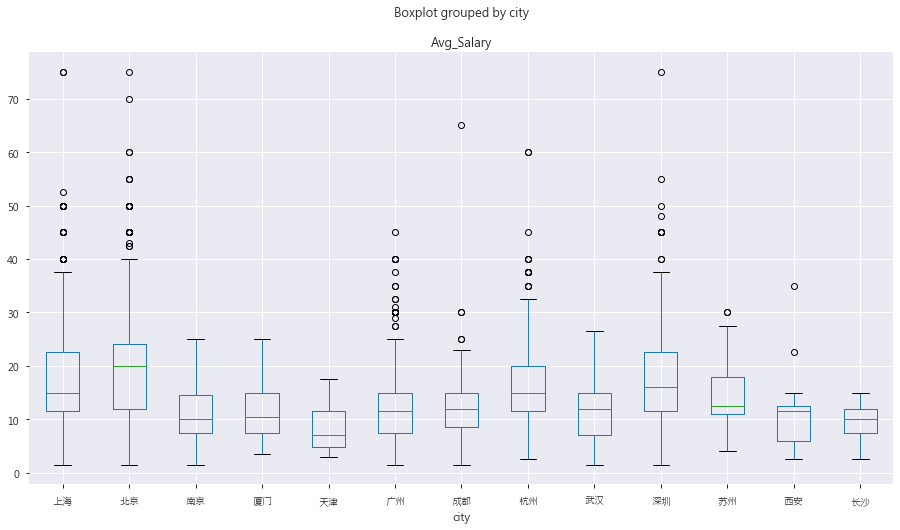

In [13]:
df_Collipse.boxplot(column='Avg_Salary', by='city', figsize=(15,8))

plt.show()